<a href="https://colab.research.google.com/github/gekaluck/bdml/blob/main/Yevhenii_Lukianchuk_M6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WOW Presentation Add-ons**

1. Driverless AI from h20.ai
2. Transformations to reduce skewness
3. Shapley values for feature importance


#*1. Driverless AI from h20.ai*

Source: https://www.forbes.com/sites/janakirammsv/2018/04/15/why-automl-is-set-to-become-the-future-of-artificial-intelligence/?sh=6ae38e5c780a
## New Section
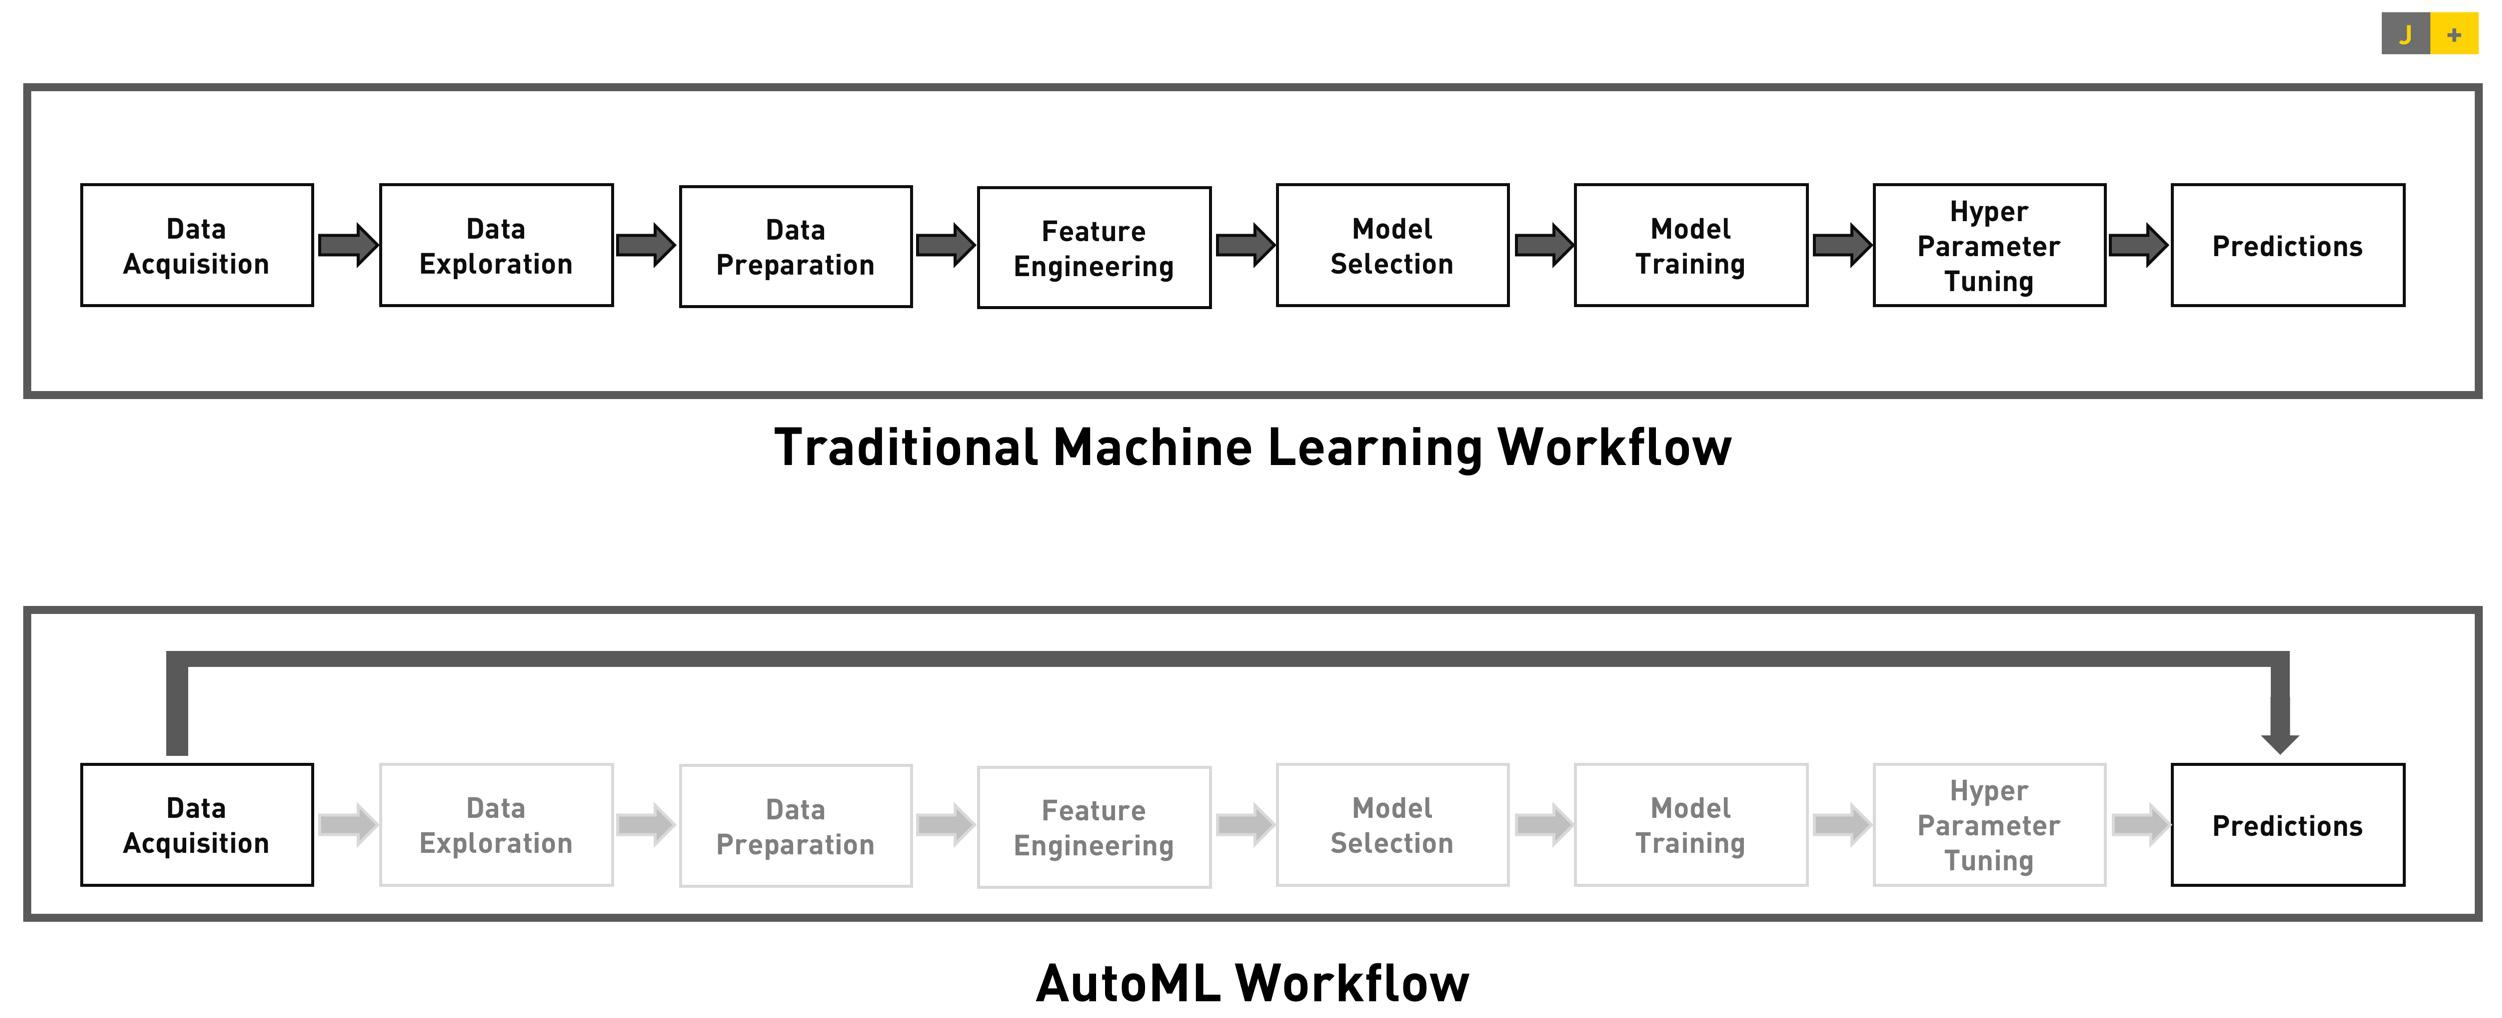

Overview: https://docs.h2o.ai/driverless-ai/latest-stable/docs/userguide/index.html#:~:text=H2O%20Driverless%20AI%20is%20an,model%20selection%2C%20and%20model%20deployment.

To get free access to Driverless AI from h20.ai: 
1) Register here https://aquarium.h2o.ai/login (it is better to use your university email address) 
2) Go through the self-paced tutorials 1A to 2A https://training.h2o.ai/driverlessai-tutorials (this should cover the basics)

Source: https://www.kdnuggets.com/2020/02/gartner-mq-2020-data-science-machine-learning.html

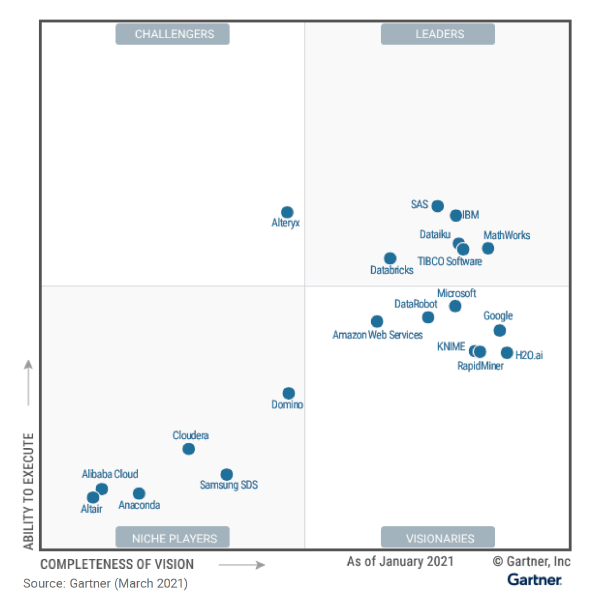

#*2. Transformation for skewness*


In [ ]:
# Mount Google drive and read in creditcard.csv data file
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_ = "drive/My Drive/Colab Notebooks/Big Data ML/creditcard.csv"
df = pd.read_csv(file_, warn_bad_lines=None) # read in csv file
df = df.drop(['Time', 'Amount'], axis=1)
feature_names = list(df.columns)[:-1]
df['Class']=df['Class'].astype('float64')
feature_names

Mounted at /content/drive


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [ ]:
df.head()
#type(df.loc[0,'Class'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
# Split the data set
# Note: split before doing any trahsformations on the data!!!

from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['Class'])]
y = df['Class']

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0, 
                     stratify=y)

print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape) 
print(y_test.head(),y_test.tail())  

(284798, 28) (284798,) (227838, 28) (227838,) (56960, 28) (56960,)
171089    0.0
203622    0.0
168332    0.0
42480     0.0
208684    0.0
Name: Class, dtype: float64 99429     0.0
219229    0.0
260774    0.0
237915    0.0
159665    0.0
Name: Class, dtype: float64


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF

In [ ]:
#X_test.dtypes
#X_train.dtypes
X_train.head()

,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
201746,0.351514,1.444677,-0.589415,-1.338191,-1.510164,0.716185,-0.763051,-2.200539,-0.423566,1.951891,0.859465,-0.735104,-0.375892,0.013282,0.978493,0.209372,-1.053111,-1.465379,0.827553,-0.075832,-0.154342,-2.286232,-0.862865,0.399436,-0.187113,2.544144,-1.054690,-1.373793
41201,0.817983,0.312105,-0.875020,0.258354,0.972470,0.520354,1.451892,-0.587813,-0.048983,0.020181,1.506844,0.944367,-0.015218,0.738545,-0.185264,-0.291246,-0.401568,0.994675,0.013123,0.156135,0.156652,-0.057791,1.540998,0.399885,-0.244480,0.256096,-1.116459,-0.669608
223831,1.950538,-0.205576,-1.286629,0.742122,1.047624,-0.231991,0.616329,0.360020,-0.838974,-0.062984,0.165330,-0.383888,-0.065471,-0.190094,-0.446521,0.239695,-0.674673,-0.324116,-0.588730,0.031595,-0.028417,-0.577527,0.330231,-0.357073,-0.326764,-0.351792,-0.104762,1.197187
242659,-1.297325,1.230740,1.005045,-0.249185,-1.862579,-0.881903,-0.613063,0.395367,0.261365,0.267639,-0.222466,1.843215,0.647738,-0.486736,-0.952251,0.187597,0.531212,-0.231416,0.126579,0.844512,0.460102,-1.006144,-0.938371,0.522092,-0.653126,0.676458,0.212974,1.098026
145721,1.935947,0.019857,-0.232047,0.357191,-0.017572,-0.065270,0.768986,0.235205,-0.567290,-0.066413,-0.428092,-0.827699,-0.073104,0.226790,0.724905,0.149601,0.770416,-0.201999,0.646093,-0.003783,-0.050845,-1.703875,-0.619177,1.644552,3.937247,-1.288557,1.052048,1.117509


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V1' had 'negative' skewness of -3.33

 Transformation yielded skewness of -0.13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


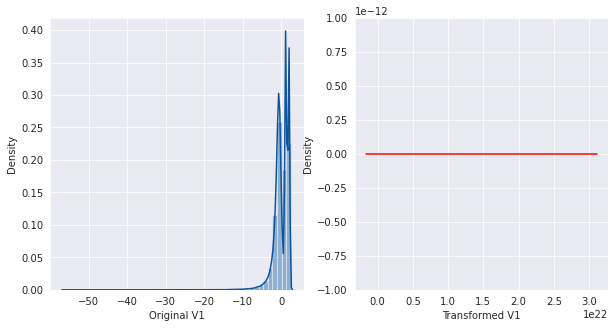

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V10' had 'positive' skewness of 1.16

 Transformation yielded skewness of 0.69


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


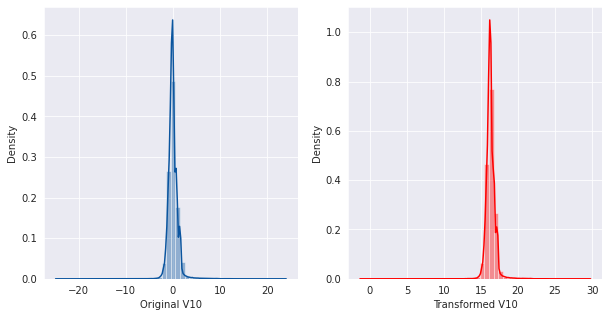

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V11' . Skewness = 0.34


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


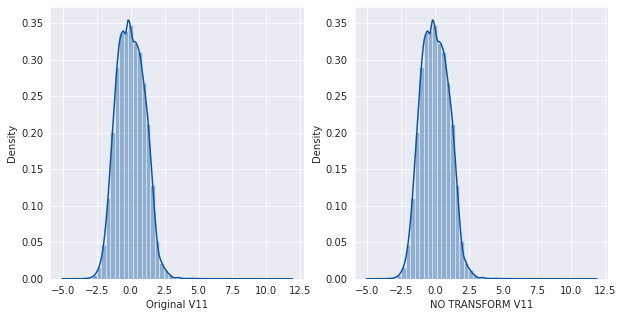

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V12' had 'negative' skewness of -2.19

 Transformation yielded skewness of 0.14


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


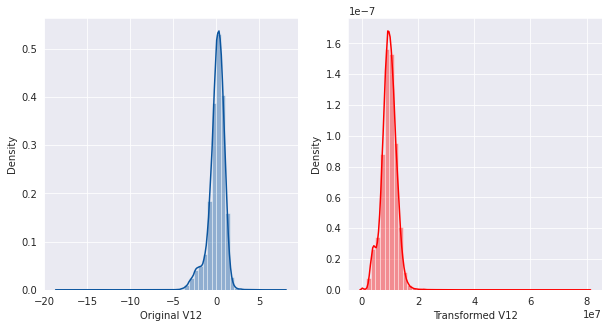

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V13' . Skewness = 0.07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


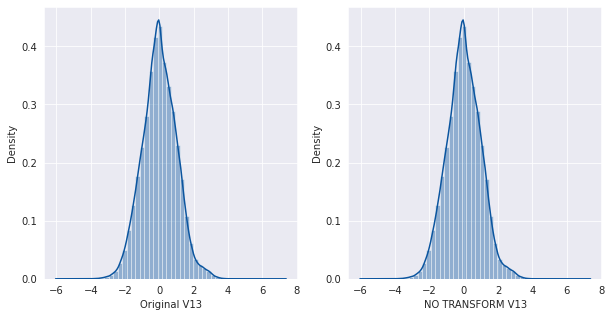

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V14' had 'negative' skewness of -1.94

 Transformation yielded skewness of 0.34


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


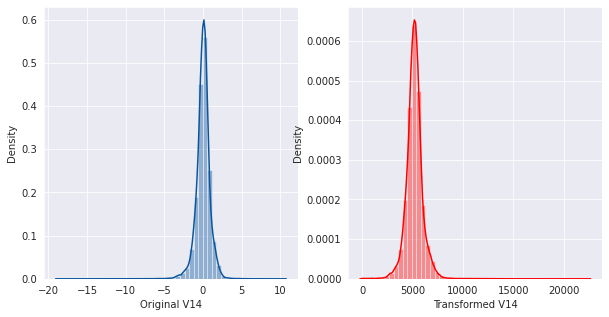

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V15' . Skewness = -0.30


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


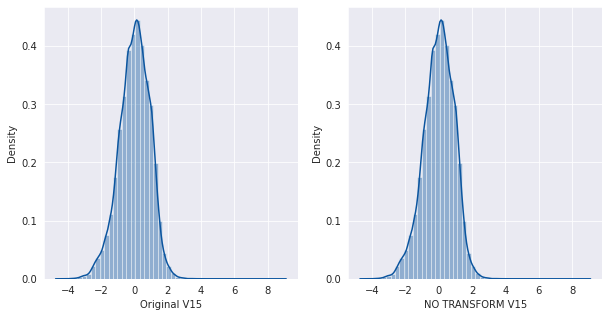

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V16' had 'negative' skewness of -1.05

 Transformation yielded skewness of 0.39


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


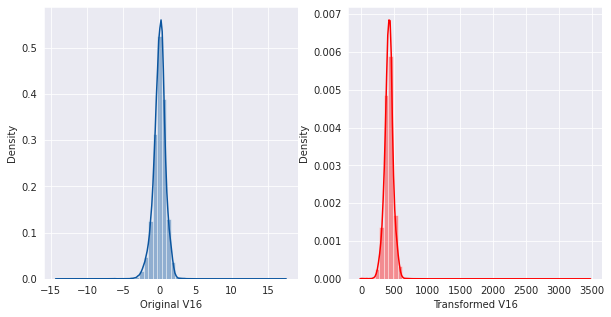

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V17' had 'negative' skewness of -3.67

 Transformation yielded skewness of 0.64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


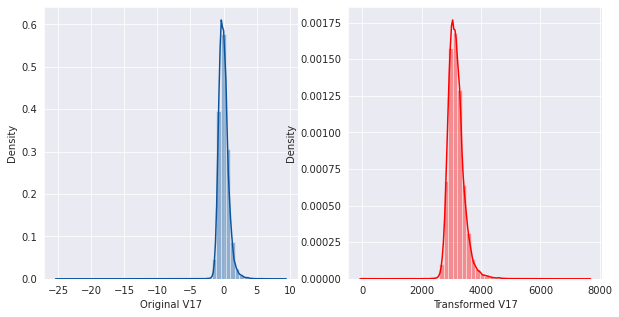

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V18' . Skewness = -0.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


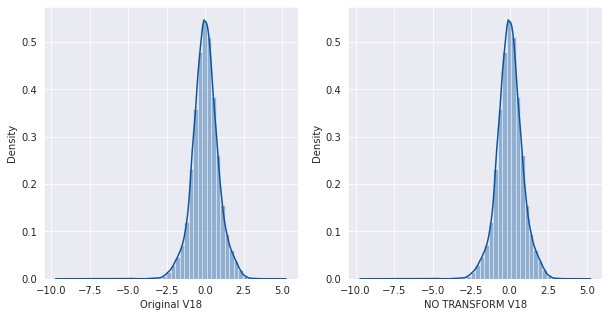

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V19' . Skewness = 0.10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


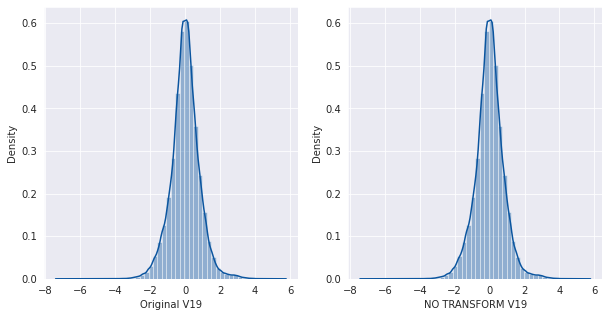

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V2' had 'negative' skewness of -4.76

 Transformation yielded skewness of 0.87


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


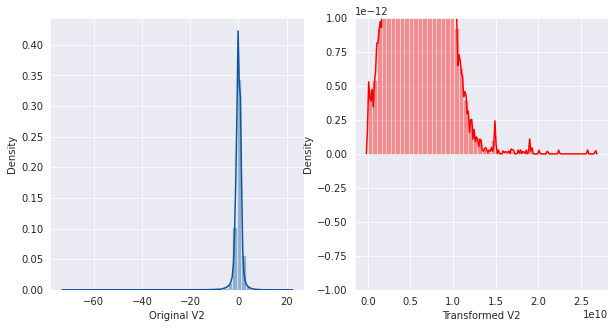

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V20' had 'negative' skewness of -2.18

 Transformation yielded skewness of 2.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


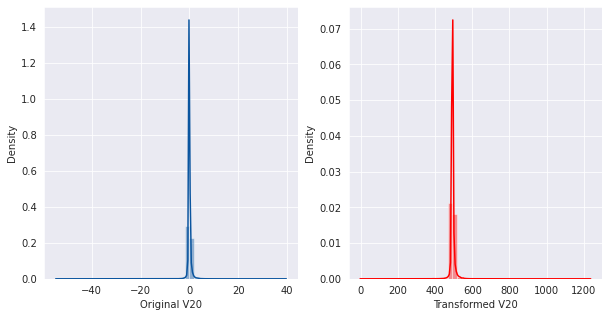

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V21' had 'positive' skewness of 3.64

 Transformation yielded skewness of 1.98


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


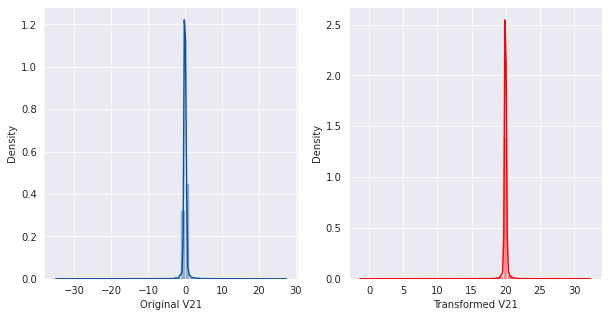

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V22' . Skewness = -0.21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


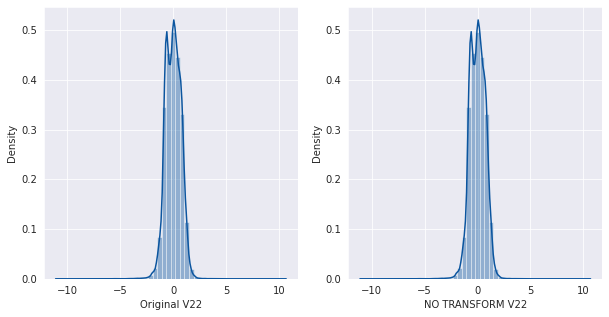

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V23' had 'negative' skewness of -6.12

 Transformation yielded skewness of 2.69


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


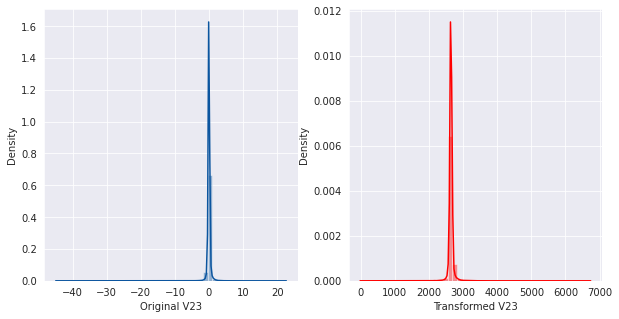

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V24' . Skewness = -0.55


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


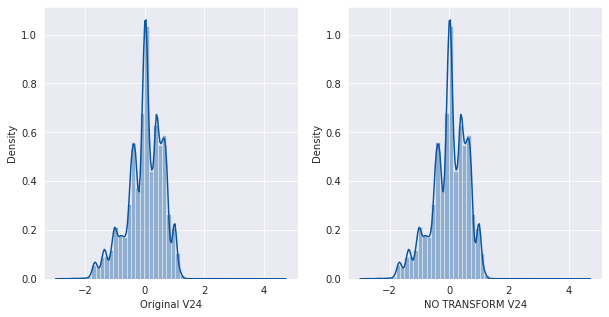

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V25' . Skewness = -0.41


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


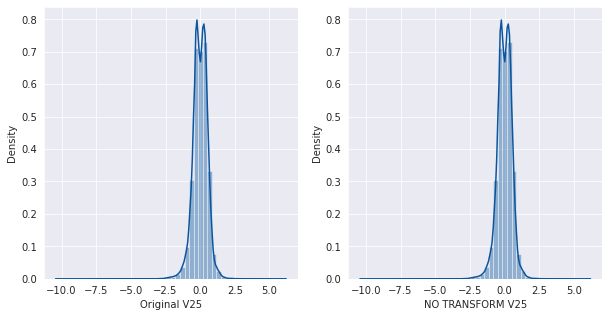

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V26' . Skewness = 0.58


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


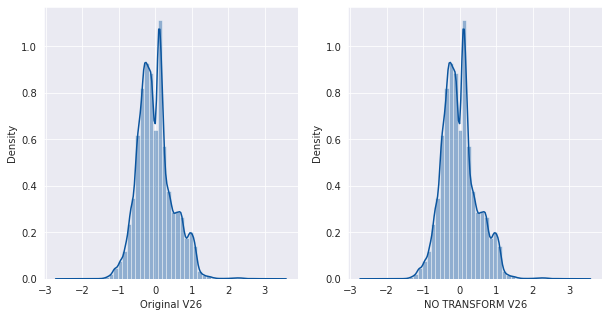

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V27' had 'negative' skewness of -1.05

 Transformation yielded skewness of 2.67


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


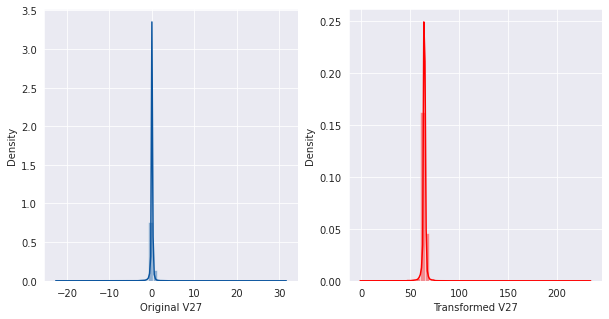

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V28' had 'positive' skewness of 11.79

 Transformation yielded skewness of 3.71


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


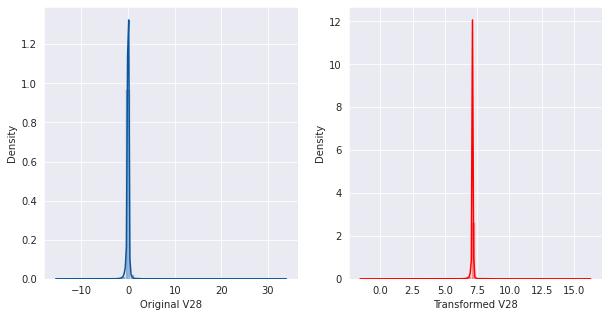

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V3' had 'negative' skewness of -2.27

 Transformation yielded skewness of 0.02


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


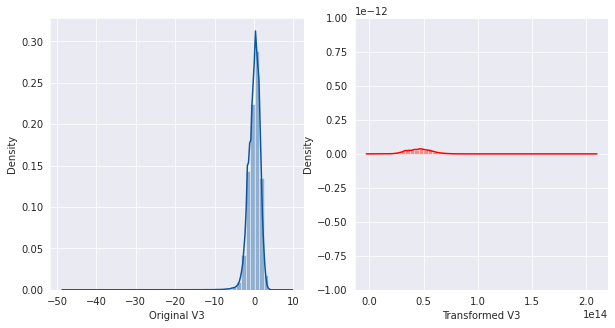

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V4' . Skewness = 0.68


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


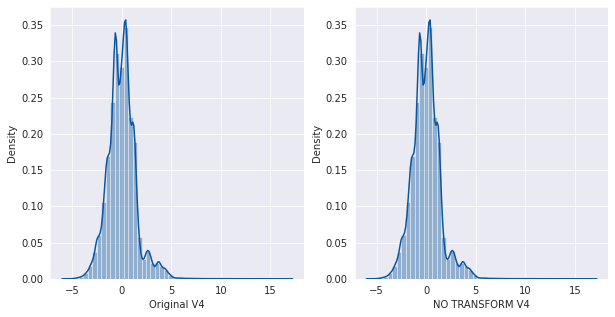

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V5' had 'negative' skewness of -2.93

 Transformation yielded skewness of 0.61


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


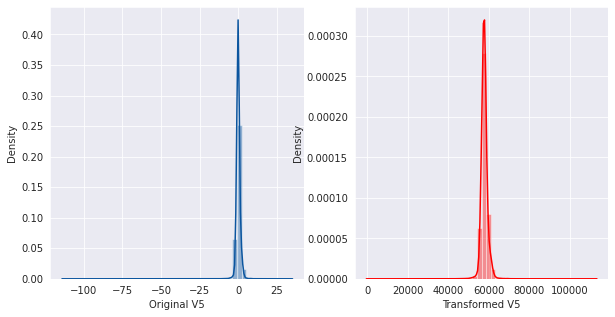

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V6' had 'positive' skewness of 1.98

 Transformation yielded skewness of 0.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


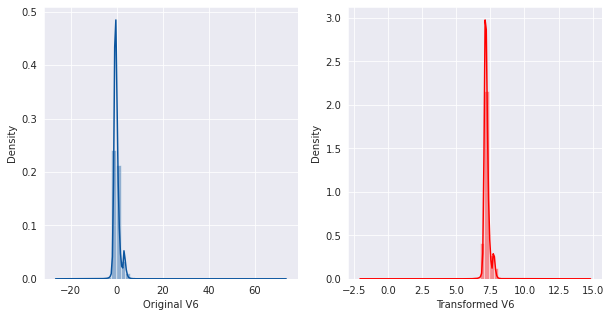

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V7' had 'positive' skewness of 3.30

 Transformation yielded skewness of 2.57


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


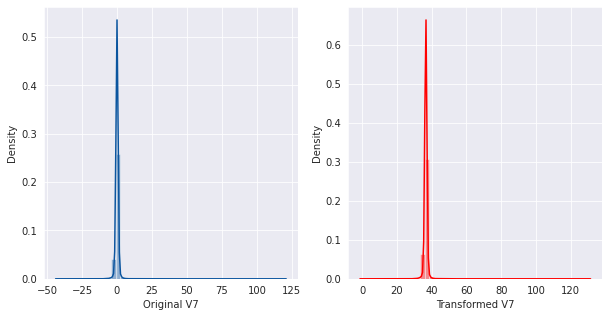

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V8' had 'negative' skewness of -8.78

 Transformation yielded skewness of 2.49


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


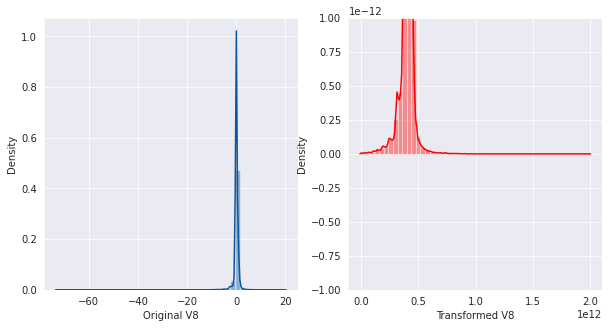

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V9' . Skewness = 0.55


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


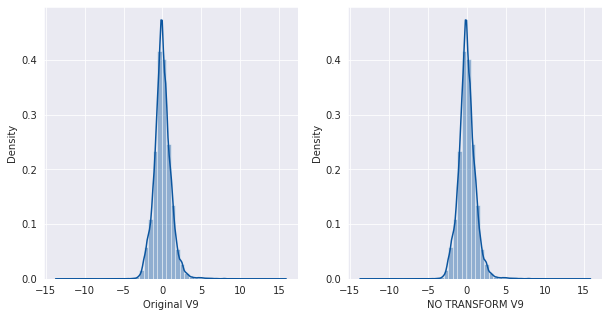

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V1' had 'negative' skewness of -3.08

 Transformation yielded skewness of -0.15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


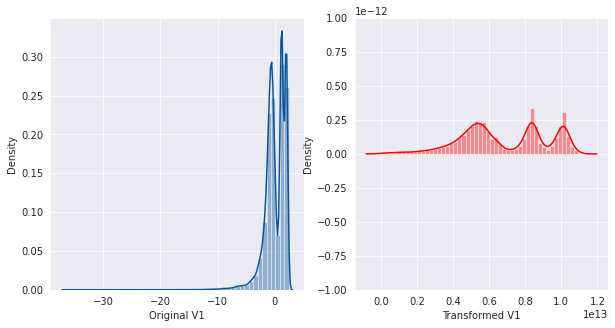

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V10' had 'positive' skewness of 1.29

 Transformation yielded skewness of 0.69


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


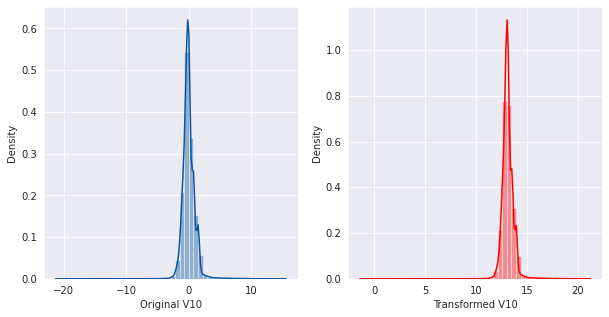

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V11' . Skewness = 0.41


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


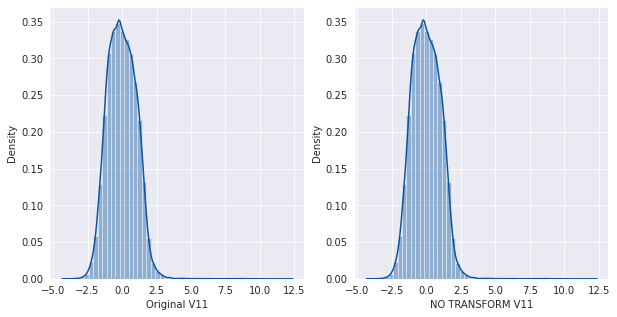

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V12' had 'negative' skewness of -2.61

 Transformation yielded skewness of 0.09


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


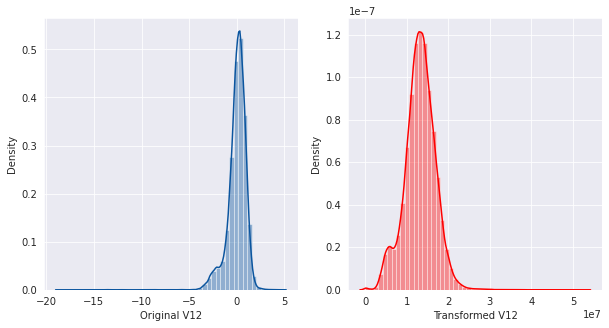

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V13' . Skewness = 0.05


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


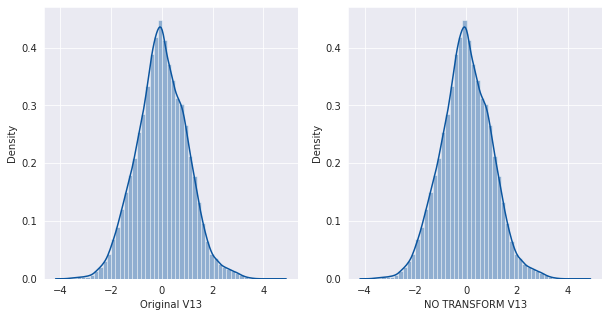

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V14' had 'negative' skewness of -2.23

 Transformation yielded skewness of 0.36


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


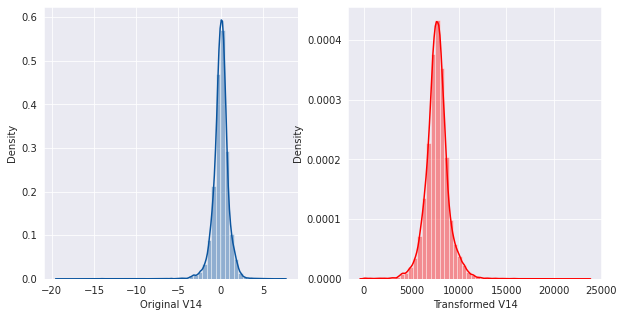

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V15' . Skewness = -0.33


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


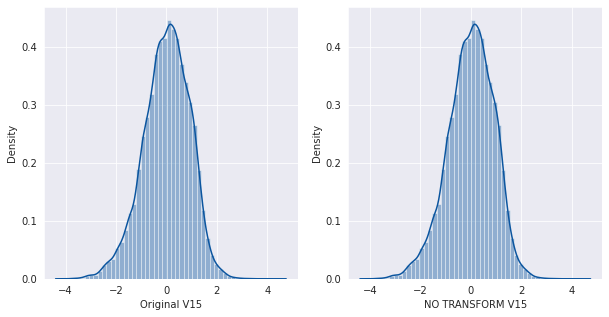

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V16' had 'negative' skewness of -1.29

 Transformation yielded skewness of 0.10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


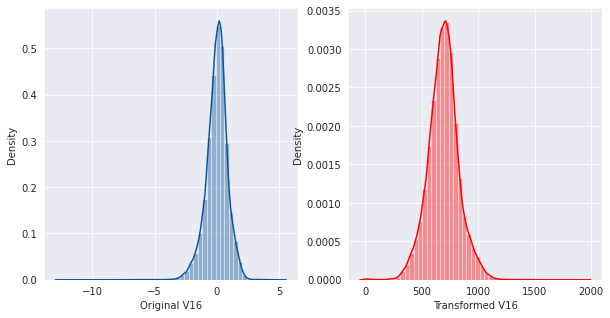

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V17' had 'negative' skewness of -4.49

 Transformation yielded skewness of 0.67


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


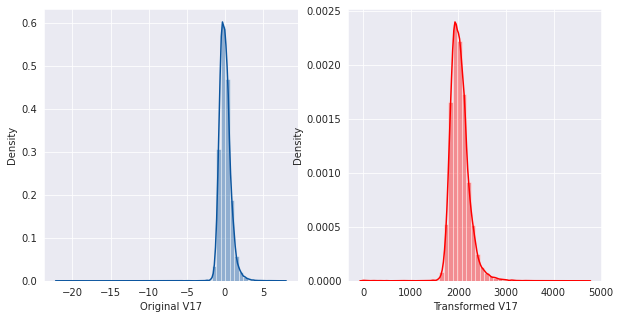

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V18' . Skewness = -0.29


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


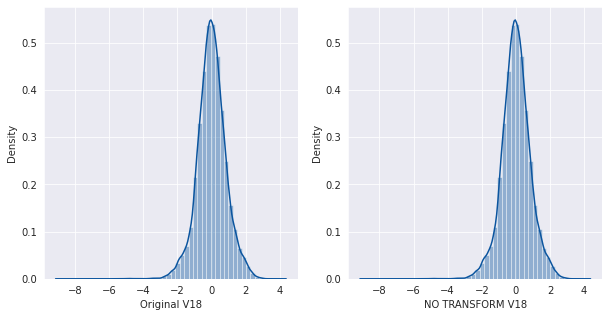

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V19' . Skewness = 0.13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


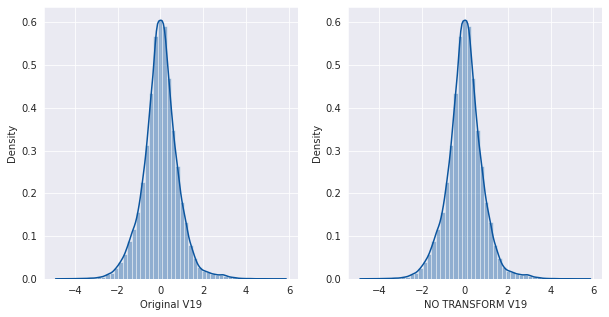

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V2' had 'negative' skewness of -4.03

 Transformation yielded skewness of 0.77


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


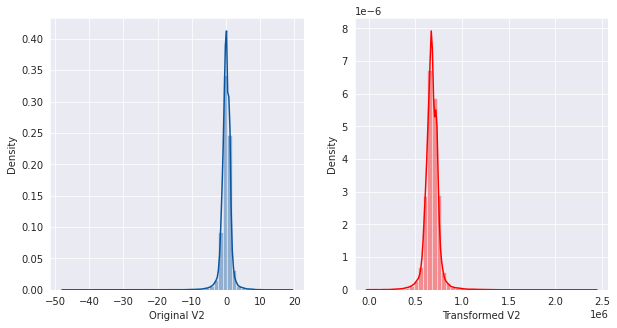

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V20' had 'negative' skewness of -1.31

 Transformation yielded skewness of 1.73


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


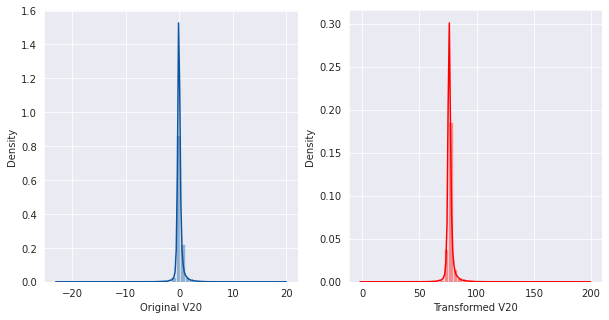

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V21' had 'positive' skewness of 3.42

 Transformation yielded skewness of 2.15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


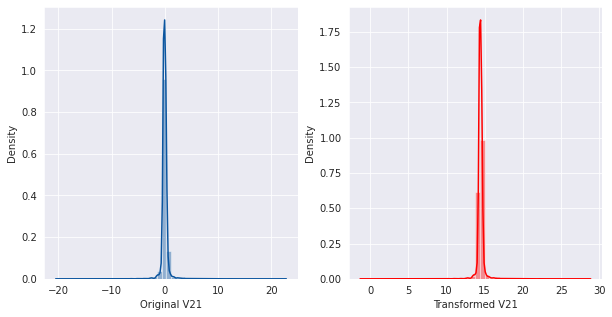

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V22' . Skewness = -0.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


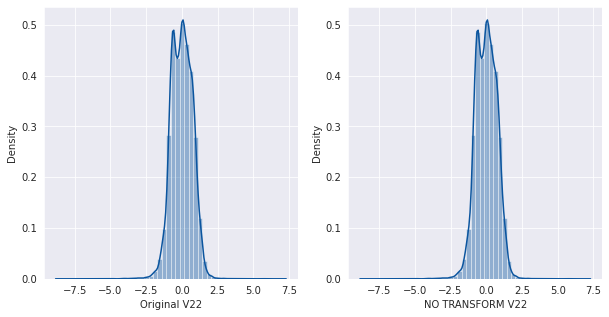

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V23' had 'negative' skewness of -4.87

 Transformation yielded skewness of 3.65


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


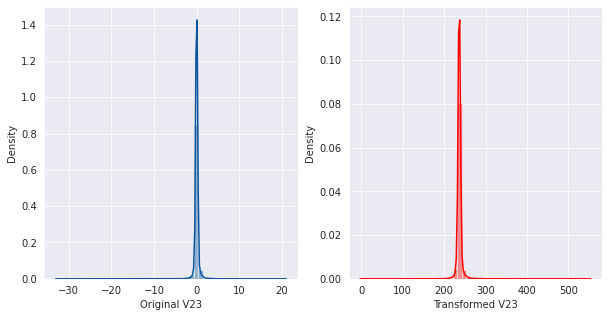

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V24' . Skewness = -0.57


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


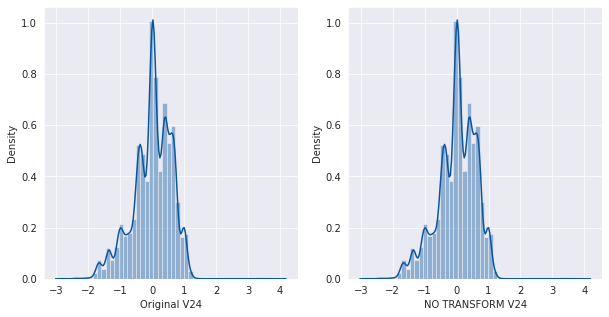

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V25' . Skewness = -0.42


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


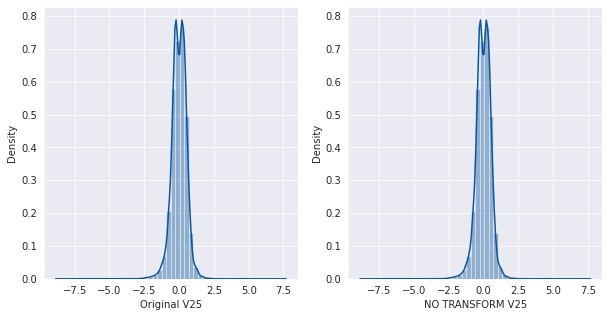

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V26' . Skewness = 0.57


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


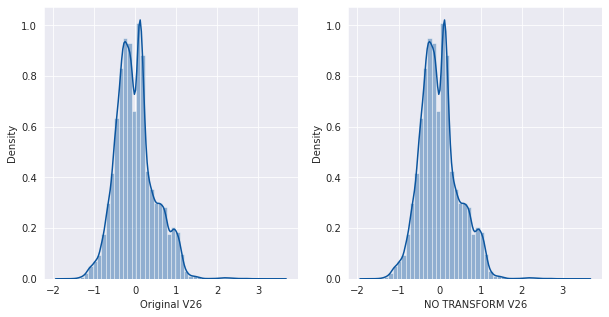

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V27' had 'negative' skewness of -1.72

 Transformation yielded skewness of 1.92


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


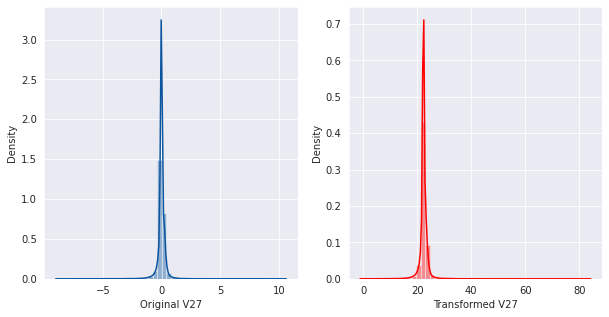

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V28' had 'positive' skewness of 8.36

 Transformation yielded skewness of 5.80


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


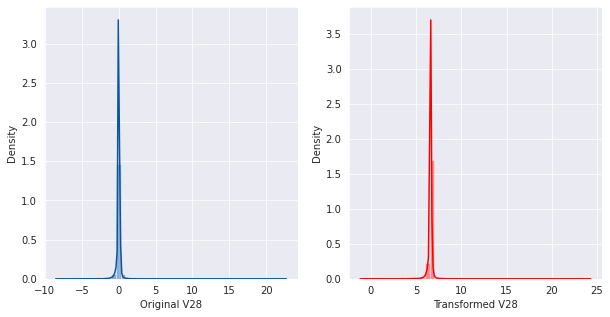

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V3' had 'negative' skewness of -2.13

 Transformation yielded skewness of 0.01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


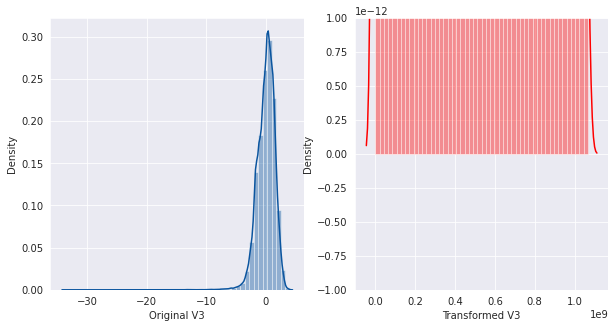

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V4' . Skewness = 0.66


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


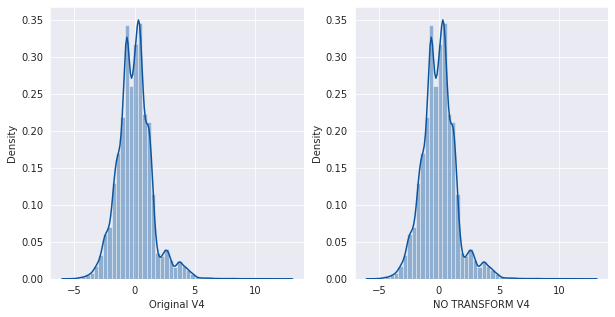

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V5' . Skewness = -0.21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


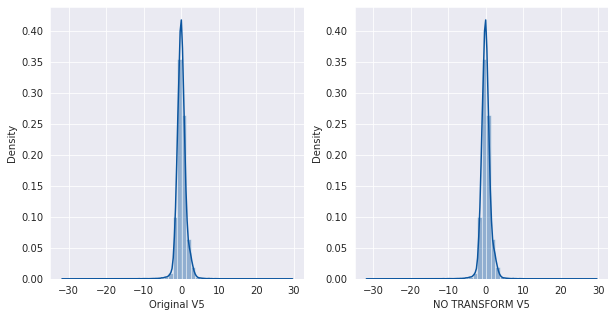

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V6' had 'positive' skewness of 1.21

 Transformation yielded skewness of 0.56


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


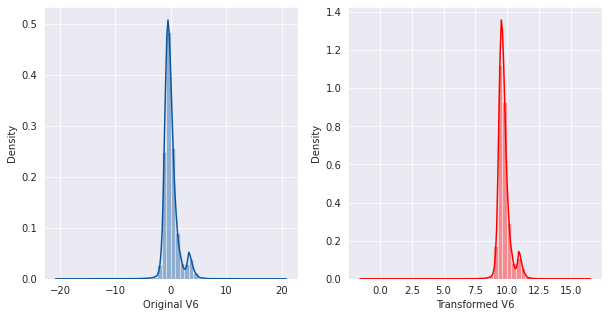

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V7' . Skewness = -0.89


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


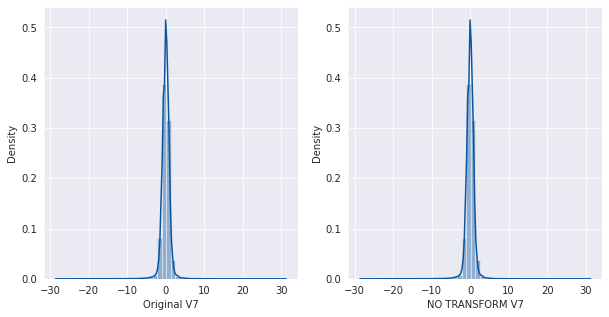

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'V8' had 'negative' skewness of -7.55

 Transformation yielded skewness of 2.82


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


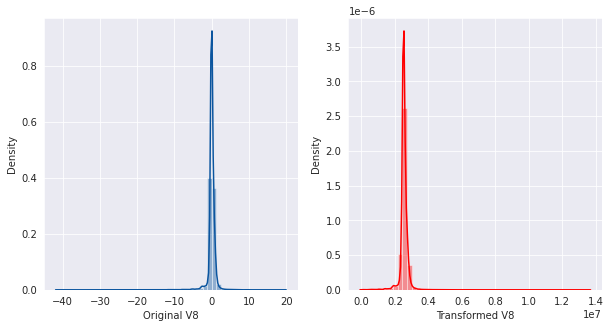

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V9' . Skewness = 0.58


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


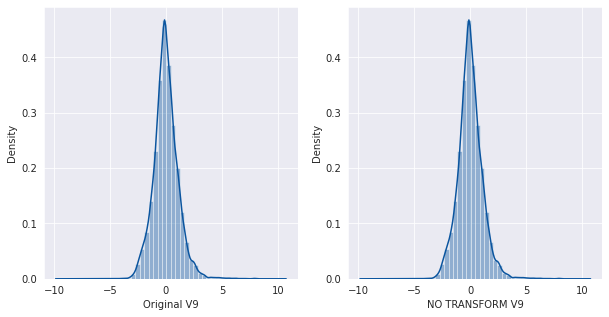

In [ ]:
# Use code from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame to auto-correct skewness
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
X_train_tr = skew_autotransform(X_train.copy(deep=True), plot = True, exp = False, threshold = 1)
X_test_tr = skew_autotransform(X_test.copy(deep=True), plot = True, exp = False, threshold = 1)

In [ ]:
# SMOTE the training and test sets separately to balance them
!pip install imbalanced-learn  #if not installed
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE

# SMOTE training set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print('No. training instances: ',len(y_train_res), ',no. positive cases: ',np.sum(y_train_res))

# SMOTE test set
sm = SMOTE(random_state=3)
X_test_res, y_test_res = sm.fit_sample(X_test, y_test)
print('No. test instances: ',len(y_test_res), ',no. positive cases: ',np.sum(y_test_res))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.4.3
No. training instances:  454888 ,no. positive cases:  227444.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


No. test instances:  113724 ,no. positive cases:  56862.0


#*3. Shapley Values*
See https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/

In [ ]:
# X_train_res and y_train_res
X_train_res=pd.DataFrame(X_train_res)
X_train_res.columns=feature_names
y_train_res=pd.DataFrame(y_train_res)
y_train_res.columns=['50K']

     |████████████████████████████████| 356 kB 6.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=42002d9f262beb0f2f72d88720a634dd699ce8967a0d2e5ba1b68b1de788efd7
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Classifier:  Logistic Regression
Confusion matrix:
 [[55531  1331]
 [ 6965 49897]]
Training accuracy: 0.9501569617136526, test accuracy: 0.9270514579156555.


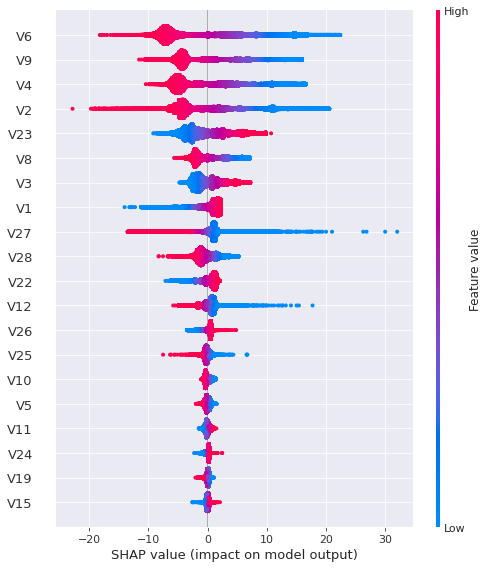



Classifier:  Decision Tree
Confusion matrix:
 [[54436  2426]
 [ 6688 50174]]
Training accuracy: 0.9575895605072018, test accuracy: 0.9198586050437902.


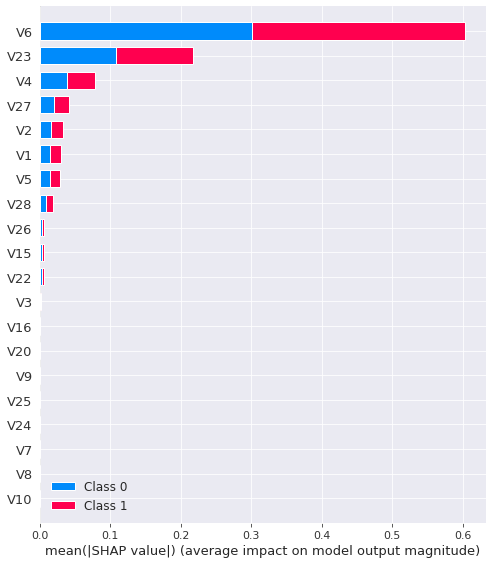

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Classifier:  k Nearest Neighbors
Confusion matrix:
 [[56809    53]
 [ 8434 48428]]
Training accuracy: 0.9997383971439123, test accuracy: 0.925371953149731.




A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Classifier:  Random Forest
Confusion matrix:
 [[56609   253]
 [ 8695 48167]]
Training accuracy: 0.9317260512477796, test accuracy: 0.9213182793429707.


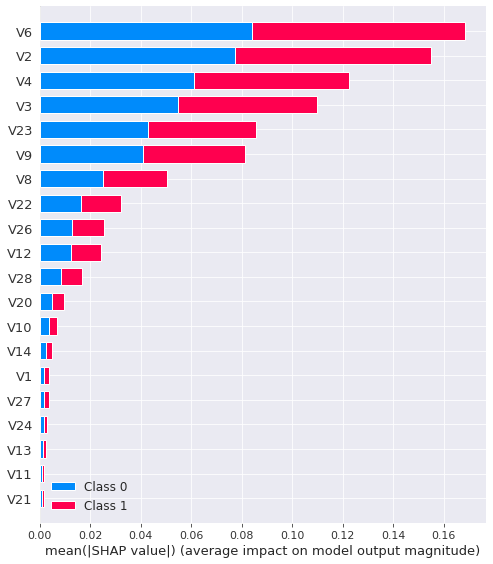

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Classifier:  Light GBM
Confusion matrix:
 [[56821    41]
 [ 7721 49141]]
Training accuracy: 0.9998307275637079, test accuracy: 0.9317470366853083.


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


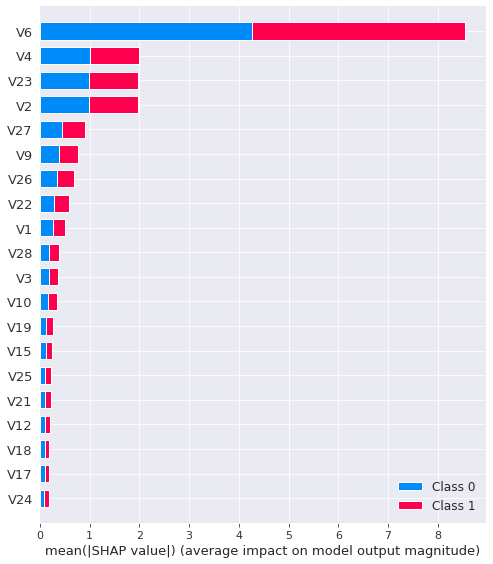

In [ ]:
# Build some classifiers
!pip install shap
!pip install lightgbm
import shap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import shap # package used to calculate Shap values
from sklearn.metrics import accuracy_score
from sklearn import tree

shap.initjs()
names = ["Logistic Regression", "Decision Tree", "k Nearest Neighbors", "Random Forest", "Light GBM"]

classifiers = [
    LogisticRegression(),   
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]
for name, clf in zip(names, classifiers):
    clf.fit(X_train_res,y_train_res)
    y_pred_train = clf.predict(X_train_res) 
    y_pred_test = clf.predict(X_test_res)
    print("Classifier: ",name)
    print("Confusion matrix:\n",confusion_matrix(y_test_res, y_pred_test))
    print('Training accuracy: {}, test accuracy: {}.'.format(accuracy_score(y_train_res, y_pred_train),accuracy_score(y_test_res, y_pred_test)))
    # if name == 'Decision Tree':
    #   text_representation = tree.export_text(clf)
    #   print(text_representation))
    if name in ['Decision Tree', 'Random Forest', 'XGBoost', 'Light GBM']:
      explainer = shap.TreeExplainer(clf)
      shap_values = explainer.shap_values(X_test_res)
      shap.summary_plot(shap_values, X_test_res,feature_names=feature_names)
    else:
      if name == "Logistic Regression":
          explainer = shap.LinearExplainer(clf,X_test_res)
          shap_values = explainer.shap_values(X_test_res)
          shap.summary_plot(shap_values, X_test_res,feature_names=feature_names)
    print("\n")


#**Natural Language Processing (NLP)**

1. Bag of Words
2. Cleaning Text Data
3. Tokenizer and Stemming
4. Stop Words
5. TF-IDF
6. Sentiment Analysis
7. Latent Dirichlet Allocation
8. Homework Assignment 6


---





Read in the IMDb data set of movie reviews. 

In [4]:
#Download IMDB dataset
import os
import sys
import tarfile
import time
import urllib.request

source = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
target = 'aclImdb_v1.tar.gz'

urllib.request.urlretrieve(source, target)

('aclImdb_v1.tar.gz', <http.client.HTTPMessage at 0x7fd51f014590>)

In [5]:
!pwd

/content


In [6]:
import tarfile
with tarfile.open('aclImdb_v1.tar.gz', 'r:gz') as tar:
  tar.extractall()

In [7]:
!pip install pyprind
import pyprind
import pandas as pd
import os

# change the `basepath` to the directory of the
# unzipped movie dataset

basepath = 'aclImdb'

labels = {'pos': 1, 'neg': 0}
pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in sorted(os.listdir(path)):
            with open(os.path.join(path, file), 
                      'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], 
                           ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:35


In [8]:
import numpy as np
#Shuffling the DataFrame:
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))

In [9]:
df.head()

,review,sentiment
11841,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
19602,OK... so... I really like Kris Kristofferson a...,0
45519,"***SPOILER*** Do not read this, if you think a...",0
25747,hi for all the people who have seen this wonde...,1
42642,"I recently bought the DVD, forgetting just how...",0


In [10]:
#Saving the assembled data as CSV file:
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

In [11]:
import pandas as pd

df = pd.read_csv('movie_data.csv', encoding='utf-8')
print("Shape: ", df.shape)
df.head(3)

Shape:  (50000, 2)


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [12]:
df.iloc[3,0]

'hi for all the people who have seen this wonderful movie im sure thet you would have liked it as much as i. i love the songs once you have seen the show you can sing along as though you are part of the show singing and dancing . dancing and singing. the song ONE is an all time fave musical song too and the strutters at the end with the mirror its so oh you have to watch this one'

## **1. Bag-of-Words**

The bag-of-words model allows us to represent text
as numerical feature vectors. The idea behind bag-of-words is quite simple and can
be summarized as follows:
1. We create a vocabulary of unique tokens—for example for each word—from the
entire set of documents.
2. We construct a feature vector from each document that contains the counts
of how often each word occurs in the particular document.

In [13]:
#Vectorize
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet'])
#By calling the fit_transform method on CountVectorizer, we just constructed the vocabulary 
# of the bag-of-words model and transformed the following three sentences into sparse feature vectors
bag = count.fit_transform(docs) 

In [14]:
print(count.vocabulary_)

{'the': 4, 'sun': 2, 'is': 0, 'shining': 1, 'weather': 5, 'sweet': 3}


In [15]:
print(bag.toarray())

[[1 1 1 0 1 0]
 [1 0 0 1 1 1]
 [2 1 1 1 2 1]]


## **2. Cleaning Text Data**

In this section we will clean the text data since it contains HTML markup, punctuations, and non-letter characters. Python's regular expresssion (regex) will be employed.  

In [16]:
#remove all of the HTML markup
# https://regexr.com/ fun site!

import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

df['review'] = df['review'].apply(preprocessor)

In [ ]:
df.head()

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


## **3. Tokenizer and Stemming**

Stemming is the process of transforming words into its root form. One of the most popular stemming algorithms is **Porter stemmer**.

In [17]:
#Word stemming: Find the root words

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [ ]:
print(tokenizer('runners like running and thus they run'))
print(tokenizer_porter('runners like running and thus they run'))

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']
['runner', 'like', 'run', 'and', 'thu', 'they', 'run']


## **4. Stop Words**
Words that carry little or no relevant information with regards to sentiment. 

In [28]:
#stop-word removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [19]:
[w for w in tokenizer_porter('the runner likes running and runs a lot') if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

In [ ]:
# Here in class we are only using the first 2.5K for training and the last 2.5K for testing
# Please run at your own to divide the DataFrame of cleaned text documents into 25,000 documents for training
# and 25,000 documents for testing

X_train = df.loc[:2500, 'review'].values
y_train = df.loc[:2500, 'sentiment'].values
X_test = df.loc[47500 :, 'review'].values
y_test = df.loc[47500 :, 'sentiment'].values


## **5. TFIDF**
Term Frequency-inverse Document Frequency is the product of term frequency and the inverse of document frequency. The **TFIDF** de-emphasizes frequently occuring words. 

See the example here: https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Example_of_tf%E2%80%93idf

## **6. Sentiment Analysis**

In [30]:
# Use a GridSearchCV object to find the optimal set of parameters for our
# logistic regression model using 5-fold stratified cross-validation

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

#TFIDF, short for term frequency–inverse document frequency. Down weight the term frequency by relevance.
tfidf = TfidfVectorizer(strip_accents=None,   
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [ ]:
#Print out the best parameter combination and the best cross validation scores

print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each'

In [ ]:
#Use the best estimators: We achieved about 90% accuracy
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.857


## **7. LDA: Topic modeling with Latent Dirichlet Allocation**

Topic modeling describes the broad task of assigning topics to documents. Documents consists of words. Words have associated probability over given number of topic. Key input is number of topics. Unsurprised learning method.

Word -> Latent (Topics) -> Document 

The input to an LDA is the bag-of-words model that we discussed earlier
in this chapter. Given a bag-of-words matrix as input, LDA decomposes it into two
new matrices:

• A document-to-topic matrix

• A word-to-topic matrix

Beginner guide to LDA: https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

In [ ]:
#Load dataset
import pandas as pd

df = pd.read_csv('movie_data.csv', encoding='utf-8')
df = df[:5000] #Please take out this constrant and run the whole database at home. It will take around 10 mints to run the model
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [ ]:
# use the CountVectorizer to create the bag-of-words
# matrix as input to the LDA
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english',
                        max_df=.1,   #we set the maximum document frequency of words to be considered to 10 percent (max_df=.1)
                                     # to exclude words that occur too frequently across documents.                        
                        max_features=5000)  #we limited the number of words to be considered 
                                            #to the most frequently occurring 5,000 words
X = count.fit_transform(df['review'].values)

In [ ]:
# Fit a LatentDirichletAllocation
# estimator to the bag-of-words matrix and infer the 10 different topics from the
# documents(take 10 mints to run the whole dataset)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,
                                random_state=123)

X_topics = lda.fit_transform(X)

In [ ]:
# To analyze the results, let's print the five most important words for each of the
# 10 topics. Note that the word importance values are ranked in increasing order.
# Thus, to print the top five words, we need to sort the topic array in reverse order

n_top_words = 5
feature_names = count.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
book read horror series different
Topic 2:
guy tv horror music girls
Topic 3:
death family believe day mother
Topic 4:
worst horror minutes effects budget
Topic 5:
series episode kids episodes car
Topic 6:
comedy jokes game laugh humor
Topic 7:
girl role goes wife woman
Topic 8:
war woman american mr women
Topic 9:
role performance family performances wonderful
Topic 10:
action series shot set shows


In [ ]:
horror = X_topics[:, 5].argsort()[::-1]

for iter_idx, movie_idx in enumerate(horror[:3]):
    print('\nHorror #%d:' % (iter_idx + 1))
    print(df['review'][movie_idx][:300], '...')


Horror #1:
Stan Laurel and Oliver Hardy had extensive (separate) film careers before they were eventually teamed. For many of Ollie's pre-Stan films, he was billed on screen as Babe Hardy ... and throughout his adult life, Hardy was known to his friends as 'Babe'. While touring postwar Britain with Laurel in a ...

Horror #2:
I am listening to Istanbul, intent, my eyes closed: At first there is a gentle breeze And the leaves on the trees Softly sway; Out there, far away, The bells of water-carriers unceasingly ring; I am listening to Istanbul, intent, my eyes closed.<br /><br />I am listening to Istanbul, intent, my eyes ...

Horror #3:
Several years ago the Navy kept a studied distance away from the making of "Men of Honor," a film based on the experiences of the service's first black master chief diver's struggle to overcome virulent racism. Ever eager to support films showing our Navy's best side the U.S.S. Nimitz and two helico ...



---



## **Assignment 6.1**
1. Rerun first part but use all the data in IMDb. 

Please run at your own to divide the DataFrame of cleaned text documents into 25,000 documents for training and 25,000 documents for testing

Change below:

X_train = df.loc[:2500, 'review'].values

y_train = df.loc[:2500, 'sentiment'].values

X_test = df.loc[47500 :, 'review'].values

y_test = df.loc[47500 :, 'sentiment'].values



In [26]:
X_train = df.loc[:24999, 'review'].values

y_train = df.loc[:24999, 'sentiment'].values

X_test = df.loc[25000 :, 'review'].values

y_test = df.loc[25000 :, 'sentiment'].values

In [32]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
# Use a GridSearchCV object to find the optimal set of parameters for our
# logistic regression model using 5-fold stratified cross-validation

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

#TFIDF, short for term frequency–inverse document frequency. Down weight the term frequency by relevance.
tfidf = TfidfVectorizer(strip_accents=None,   
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [34]:
#Print out the best parameter combination and the best cross validation scores

# The only thing that I do not get from the result why is 'vect__stop_words': None

print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)


Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7fd518fa1f80>} 
CV Accuracy: 0.897


In [35]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

# The accuracy has improved by ~4% when using 25000 training instances insted of 2500

Test Accuracy: 0.899


# LDA


In [36]:
#Load dataset
import pandas as pd

df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [37]:
# use the CountVectorizer to create the bag-of-words
# matrix as input to the LDA
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english',
                        max_df=.1,   #we set the maximum document frequency of words to be considered to 10 percent (max_df=.1)
                                     # to exclude words that occur too frequently across documents.                        
                        max_features=5000)  #we limited the number of words to be considered 
                                            #to the most frequently occurring 5,000 words
X = count.fit_transform(df['review'].values)

In [38]:
# Fit a LatentDirichletAllocation
# estimator to the bag-of-words matrix and infer the 10 different topics from the
# documents(take 10 mints to run the whole dataset)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,
                                random_state=123)

X_topics = lda.fit_transform(X)

In [39]:
# To analyze the results, let's print the five most important words for each of the
# 10 topics. Note that the word importance values are ranked in increasing order.
# Thus, to print the top five words, we need to sort the topic array in reverse order

n_top_words = 5
feature_names = count.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
worst minutes awful script stupid
Topic 2:
family mother father children girl
Topic 3:
american war dvd music tv
Topic 4:
human audience cinema art sense
Topic 5:
police guy car dead murder
Topic 6:
horror house sex girl woman
Topic 7:
role performance comedy actor performances
Topic 8:
series episode war episodes tv
Topic 9:
book version original read novel
Topic 10:
action fight guy guys cool


In [52]:
police_murder_topic = X_topics[:, 4].argsort()[::-1]

for iter_idx, movie_idx in enumerate(police_murder_topic[:5]):
    print('\nPolice & murder topic #%d:' % (iter_idx + 1))
    print(df['review'][movie_idx][:300], '...')


Police & murder topic #1:
**SPOILERS** Extremely brutal police drama set in San Francisco involving a sting operation that goes terribly wrong. A cop Det. Falon, Sam Elliott,mistakenly and savagely beats to death an undercover policeman Winch, Mike Watson,thinking that he murdered his partner Det. Sam Levinson, Mike Burstyn. ...

Police & murder topic #2:
Two stars <br /><br />Amanda Plummer looking like a young version of her father, Christopher Plummer in drag, stars in this film along with Robert Forster--who really should have put a little shoe black on top of that bald spot.<br /><br />I've never seen Amanda Plummer in a good film. She always pl ...

Police & murder topic #3:
A film without conscience. Drifter agrees to kill a man for a mobster for money. Then they double cross him. Meanwhile he falls in love with the dead man's wife, and, without her knowing he's the killer, moves in with her. Then he "accidentally" kills her when she finds out. Then, in a WALKING TALL  ...

Pol

## **Assignment 6.2 - Build your final project AI model**
1. Clearly lay out your hypothesis for your final project.
2. Explain the benefits of your AI prediction model. 
3. Build your model. Report all steps, what worked, what didn't. 
4. Apply all the AI best practices learnt in class, e.g. transforming data, feature engineering, k-fold CV, pipeline, gridsearch, SMOTE, etc. 

In [ ]:
# I will submit this in WOW project section